In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates
import seaborn as sns
import os
from scipy import stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
from pytrends.request import TrendReq 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Connecting to Google
pytrend = TrendReq(timeout=(10,45), retries=2, backoff_factor=0.1)

In [4]:
pytrend.build_payload(kw_list=['insomnia'], geo = 'US')

In [5]:
# Related Queries, returns a dictionary of dataframes 
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                         query  value
0                     cookies    100
1            insomnia cookies     99
2              sleep insomnia     34
3            what is insomnia     12
4             insomnia cookie     10
5          insomnia pregnancy      9
6           insomnia symptoms      9
7             cookies near me      8
8    insomnia cookies near me      8
9         insomnia definition      7
10            insomnia causes      5
11            insomnia icd 10      5
12          insomnia delivery      5
13         insomnia treatment      5
14                 depression      5
15        insomnia depression      5
16  insomnia cookies delivery      4
17             insomnia movie      4
18              insomnia menu      4
19                sleep apnea      4
20          insomnia disorder      4
21              insomnia cure      4
22    insomnia cookies coupon      4
23        insomnia medication      3
24           chronic insomnia      3, 'rising':       

In [ ]:
GST_MH = ['insomnia','alone','angst','suicide','mindfulness',
'pharmacy near me','cvs near me','unemployment','anxiety','psychiatrist near me','psychiatrist',
'therapy near me','therapy','alcohol','alcohol near me','meditation','anxiety meditation','depressed','am i depressed']

In [6]:
groupkeywords = list(zip(*[iter(GST_MH)]*1))
groupkeywords = [list(x) for x in groupkeywords]

In [7]:
#choosing timestamp and location
dicti = {}
i = 1
for trending in groupkeywords:
    pytrend.build_payload(trending, timeframe = '2005-01-01 2022-01-15', geo = 'US')
    dicti[i] = pytrend.interest_over_time()
    i+=1

In [8]:
GST_MH_US = pd.concat(dicti, axis=1)
GST_MH_US.columns = GST_MH_US.columns.droplevel(0)
GST_MH_US = GST_MH_US.drop('isPartial', axis = 1)

#GST_MH_US.head()

In [9]:
GST_MH_US.to_csv('GST_MH_US.csv', index = True)

In [10]:
GST_MH_US = pd.read_csv('GST_MH_US.csv',
                          infer_datetime_format=True,
                          parse_dates=['date'],
                          index_col='date')
GST_MH_US.head()

,insomnia,alone,angst,suicide,mindfulness,pharmacy near me,cvs near me,unemployment,anxiety,psychiatrist near me,psychiatrist,therapy near me,therapy,alcohol,alcohol near me,meditation,anxiety meditation,depressed,am i depressed
date,,,,,,,,,,,,,,,,,,,
2005-01-01,53,40,30,17,25,0,0,5,42,0,41,0,77,47,0,57,31,48,46
2005-02-01,45,30,64,26,8,0,0,4,41,0,47,0,76,50,0,51,16,40,37
2005-03-01,47,32,44,23,20,0,0,4,34,0,60,0,84,49,0,48,0,40,32
2005-04-01,42,29,62,21,18,0,0,4,39,0,43,0,79,52,0,49,16,59,12
2005-05-01,43,33,50,19,7,0,0,4,40,0,44,0,77,50,0,53,0,32,21


In [12]:
#convert date column to datetimes
GST_MH_US['date'] = pd.to_datetime(GST_MH_US.index)

In [26]:
#group searches by year
GST_MH_US_Year = GST_MH_US.resample('Y', on='date')[ 'alone', 'suicide', 'unemployment', 'pharmacy near me', 'cvs near me',
          'psychiatrist near me', 'therapy near me', 'alcohol near me', 'anxiety meditation', 'anxiety','mindfulness', 
            'psychiatrist', 'insomnia', 'angst','therapy','alcohol','meditation', 'depressed', 'am i depressed'].mean()

In [27]:
GST_MH_US_Year.index = pd.to_datetime(GST_MH_US_Year.index, format='%Y-%m-%d').year

In [28]:
GST_MH_US_Year.head()

,alone,suicide,unemployment,pharmacy near me,cvs near me,psychiatrist near me,therapy near me,alcohol near me,anxiety meditation,anxiety,mindfulness,psychiatrist,insomnia,angst,therapy,alcohol,meditation,depressed,am i depressed
date,,,,,,,,,,,,,,,,,,,
2005,30.083333,19.333333,4.166667,0.0,0.0,0.0,0.000000,0.000000,8.500000,38.333333,15.500000,47.333333,42.750000,52.000000,75.333333,47.916667,50.583333,38.000000,19.583333
2006,26.250000,16.750000,4.083333,0.0,0.0,0.0,0.083333,0.000000,3.583333,37.000000,16.916667,45.083333,37.916667,39.000000,73.000000,44.583333,50.500000,33.250000,24.416667
2007,30.750000,15.833333,4.500000,0.0,0.0,0.0,0.000000,0.166667,9.083333,35.416667,18.916667,47.416667,36.500000,38.000000,70.083333,43.000000,47.166667,32.416667,23.416667
2008,30.500000,16.250000,6.916667,0.0,0.0,0.0,0.000000,0.000000,9.333333,35.166667,18.333333,46.166667,41.250000,34.583333,68.083333,41.333333,44.416667,37.000000,31.916667
2009,33.750000,15.500000,14.416667,0.0,0.0,0.0,0.000000,0.250000,10.000000,35.833333,22.000000,50.333333,46.250000,47.666667,71.333333,44.416667,43.833333,42.583333,45.083333


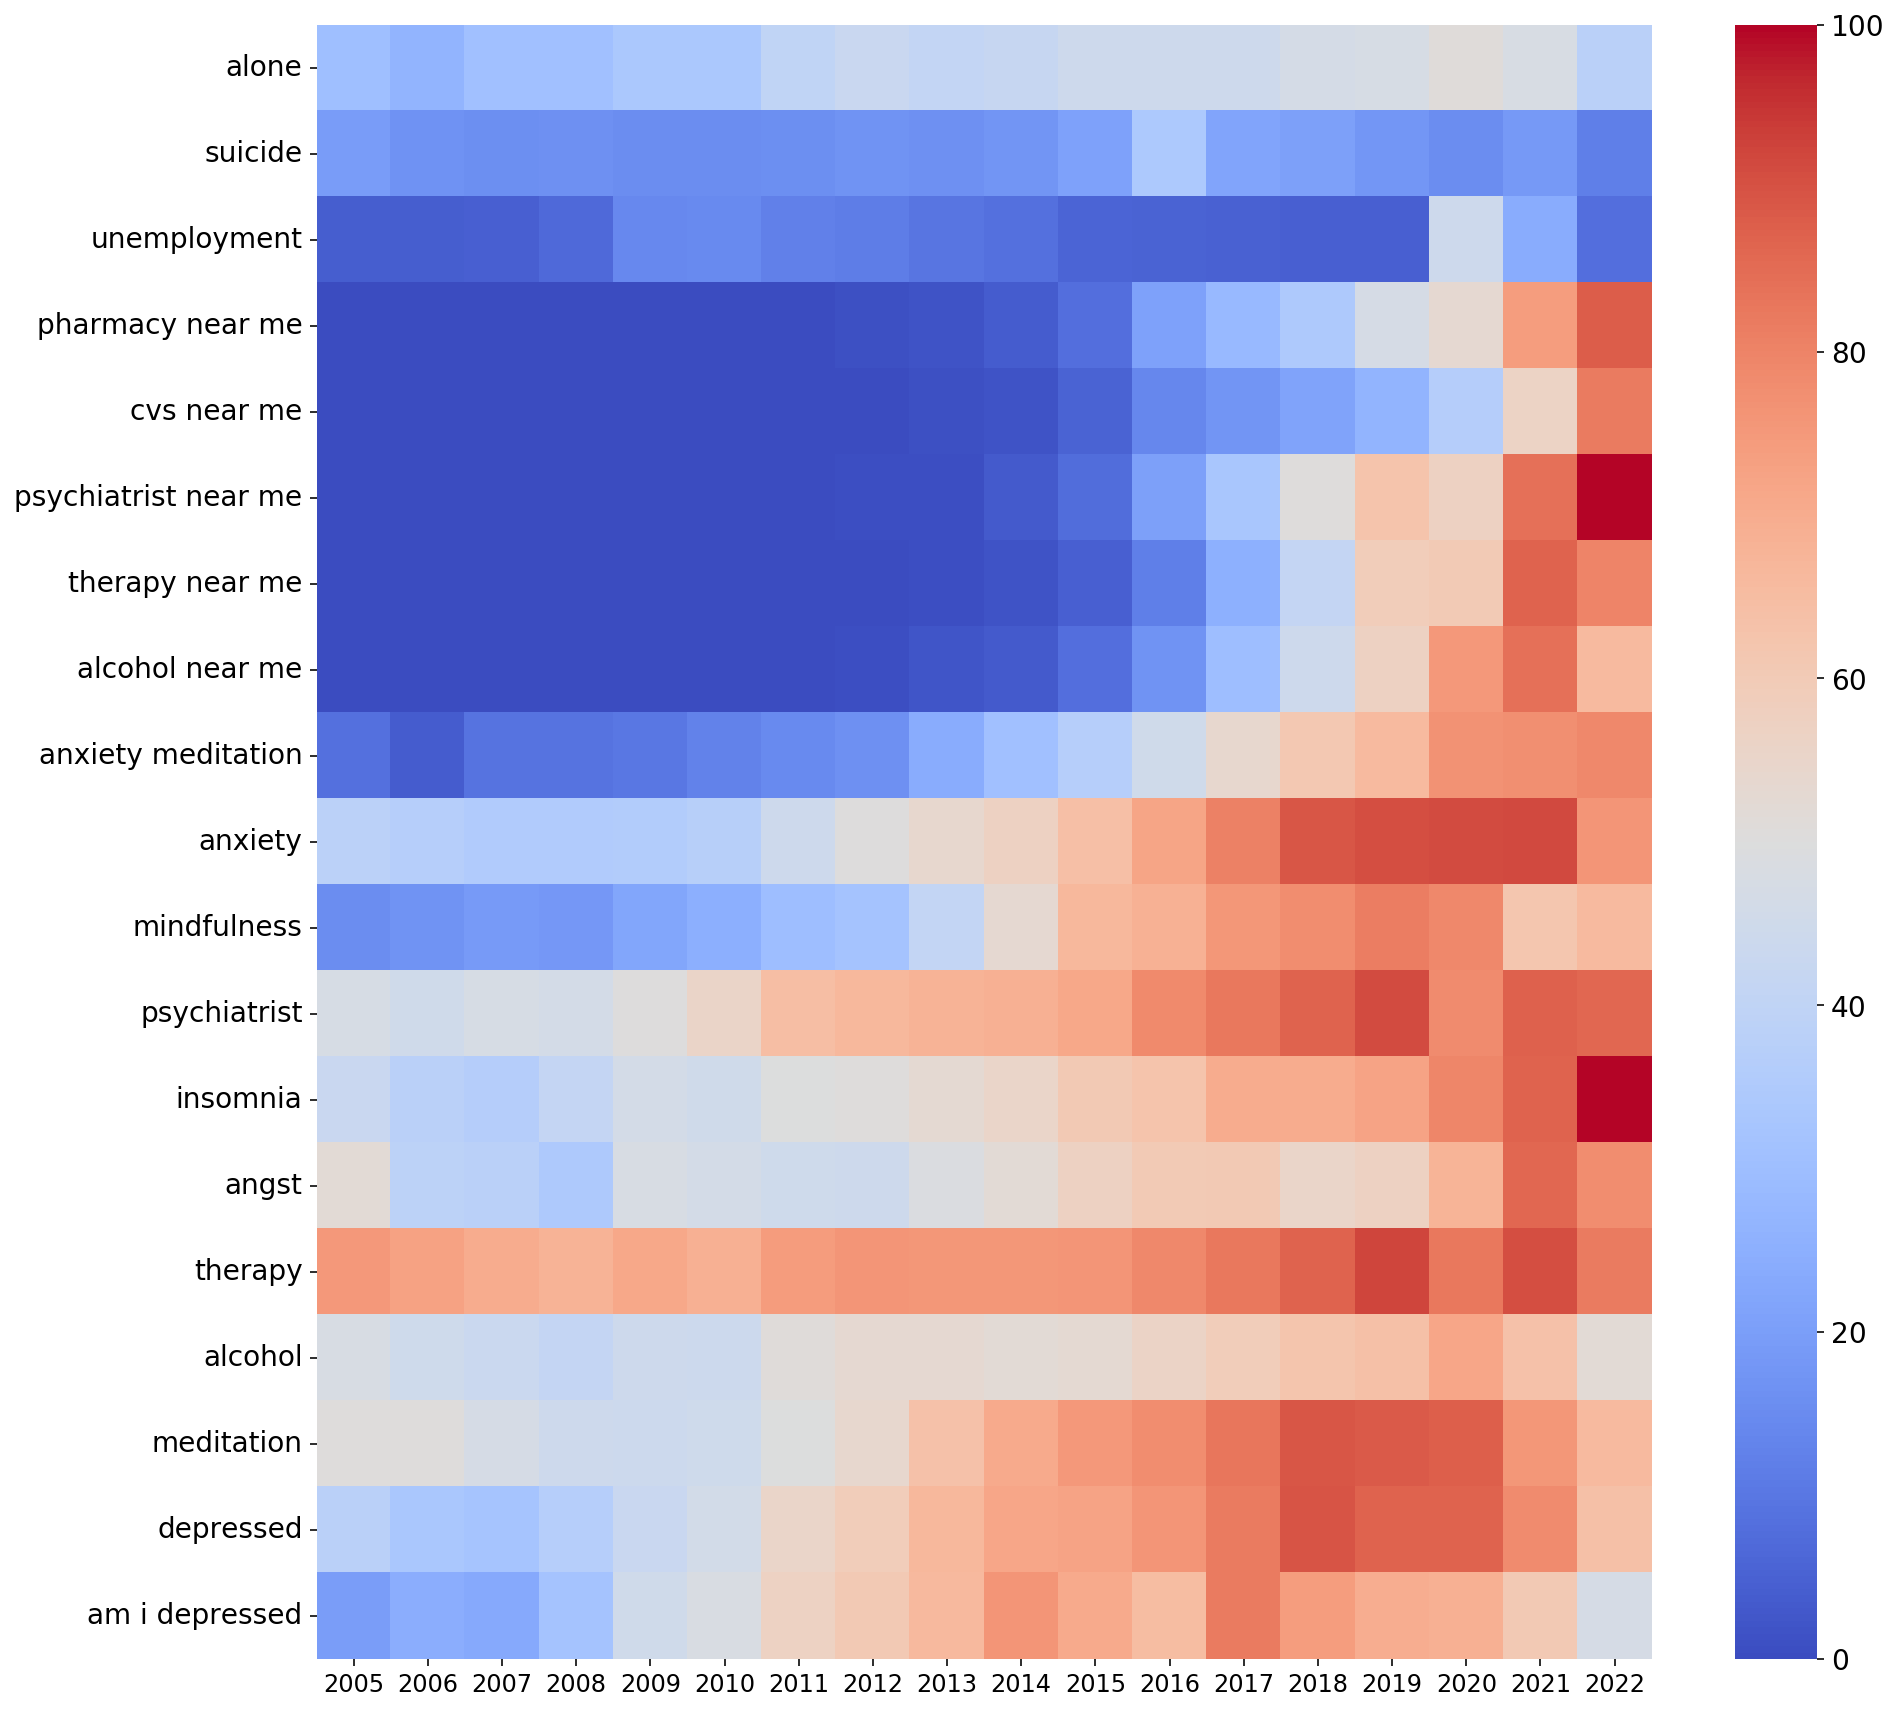

In [40]:
plt.figure(figsize=(14, 12))
#plt.tick_params(colors='white')
ax = sns.heatmap(GST_MH_US_Year.T,annot= False,cmap='coolwarm')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
ax.set(xlabel=None)
plt.tight_layout()